In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({13: 328, 0: 312, 2: 272, 11: 249, 7: 219, 12: 210, 5: 199, 3: 198, 10: 187, 9: 182, 6: 181, 15: 170, 14: 169, 4: 142, 1: 141, 8: 133})


In [7]:
smote = SMOTE(random_state=42)

In [8]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({2: 328, 15: 328, 3: 328, 11: 328, 9: 328, 13: 328, 0: 328, 6: 328, 10: 328, 8: 328, 7: 328, 14: 328, 12: 328, 5: 328, 1: 328, 4: 328})


In [10]:
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = nb_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes's acc: {acc}")

Naive Bayes's acc: 0.21723300970873785


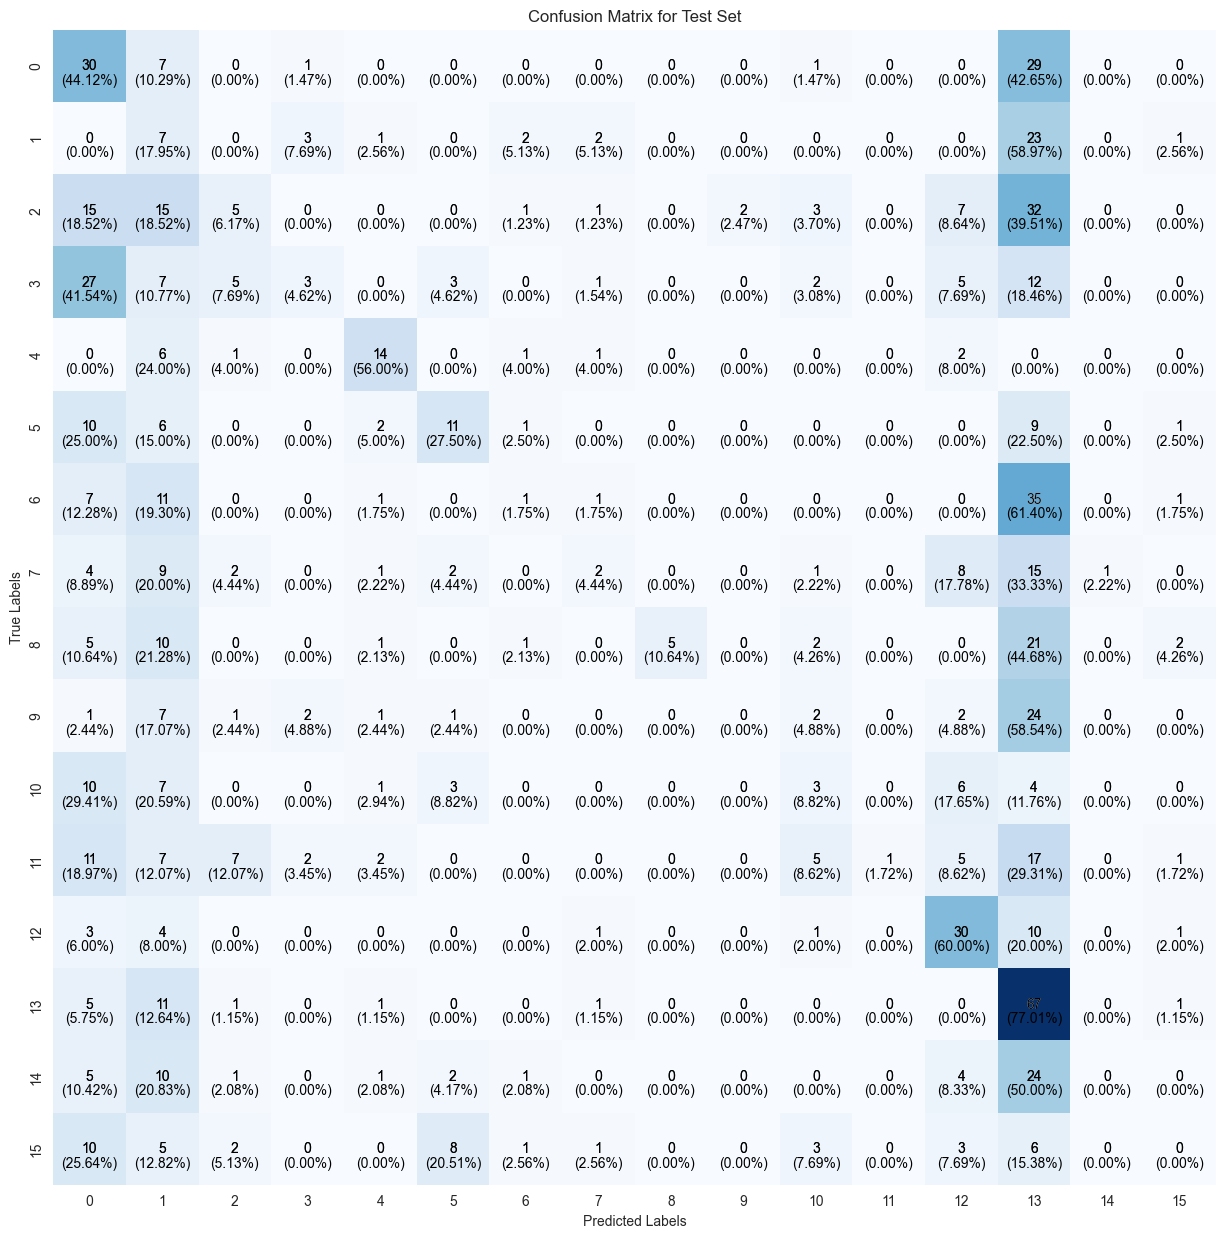

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.44      0.28        68
           1       0.05      0.18      0.08        39
           2       0.20      0.06      0.09        81
           3       0.27      0.05      0.08        65
           4       0.54      0.56      0.55        25
           5       0.37      0.28      0.31        40
           6       0.11      0.02      0.03        57
           7       0.18      0.04      0.07        45
           8       1.00      0.11      0.19        47
           9       0.00      0.00      0.00        41
          10       0.13      0.09      0.11        34
          11       1.00      0.02      0.03        58
          12       0.42      0.60      0.49        50
          13       0.20      0.77      0.32        87
          14       0.00      0.00      0.00        48
          15       0.00      0.00      0.00        39

    accuracy                           0.22       824
   macro avg       0.29   

--------------------------------------------------------------------------------------------

In [13]:
df = pd.read_csv("/Users/rolandtran/Documents/Repos/Student-Career-Prediction-System/data/cleaned/processed_raw_CareerMapping1.csv")

In [14]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [15]:
y = df['Role_encoded']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(f"Số lượng mẫu ban đầu của tập Train: {Counter(y_train)}")

Số lượng mẫu ban đầu của tập Train: Counter({13: 328, 0: 312, 2: 272, 11: 249, 7: 219, 12: 210, 5: 199, 3: 198, 10: 187, 9: 182, 6: 181, 15: 170, 14: 169, 4: 142, 1: 141, 8: 133})


In [18]:
smote = SMOTE(random_state=42)

In [19]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
print(f"Số lượng mẫu sau khi SMOTE: {Counter(y_train_resampled)}")

Số lượng mẫu sau khi SMOTE: Counter({2: 328, 15: 328, 3: 328, 11: 328, 9: 328, 13: 328, 0: 328, 6: 328, 10: 328, 8: 328, 7: 328, 14: 328, 12: 328, 5: 328, 1: 328, 4: 328})


In [21]:
nb_pipeline = make_pipeline(StandardScaler(), GaussianNB())
nb_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = nb_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Naive Bayes's acc: {acc}")

Naive Bayes's acc: 0.21480582524271843


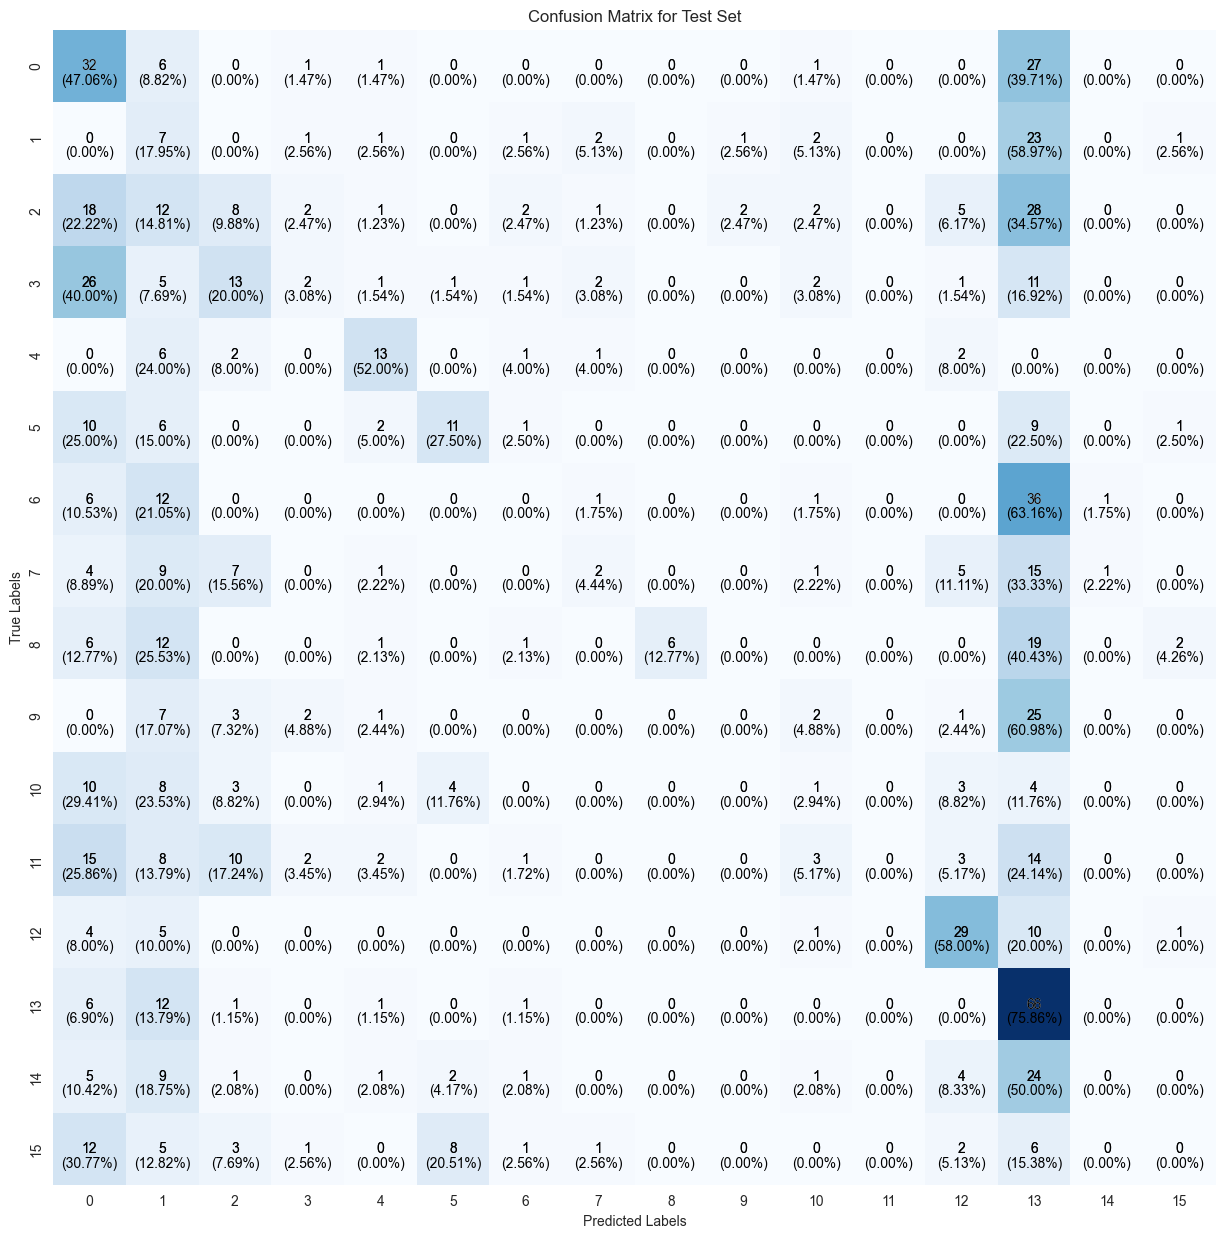

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.47      0.29        68
           1       0.05      0.18      0.08        39
           2       0.16      0.10      0.12        81
           3       0.18      0.03      0.05        65
           4       0.48      0.52      0.50        25
           5       0.42      0.28      0.33        40
           6       0.00      0.00      0.00        57
           7       0.20      0.04      0.07        45
           8       1.00      0.13      0.23        47
           9       0.00      0.00      0.00        41
          10       0.06      0.03      0.04        34
          11       0.00      0.00      0.00        58
          12       0.53      0.58      0.55        50
          13       0.21      0.76      0.33        87
          14       0.00      0.00      0.00        48
          15       0.00      0.00      0.00        39

    accuracy                           0.21       824
   macro avg       0.22   

/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/rolandtran/miniconda3/envs/DA/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me